# Gaussian Process Regression with Multiple Features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [3]:
data_file = "japan_baseweld.csv"
df = pd.read_csv(data_file)
df.head()

,Cu,Ni,P,T,Fluence,DeltaNDT
0,0.018,0.74,0.005,289,2.70,12
1,0.020,0.75,0.005,289,0.86,7
2,0.029,0.73,0.005,289,0.90,2
3,0.029,0.73,0.005,289,2.60,10
4,0.030,0.57,0.005,288,0.06,32


In [4]:
X = df.drop('DeltaNDT', axis =1)
y = df.DeltaNDT

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)

In [6]:
#gp = GaussianProcess()
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=0.5)
gpr.fit(X_train,Y_train)

GaussianProcessRegressor(alpha=0.5, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [7]:
train_preds = gpr.predict(X_train)

Text(0.5, 1, 'Histogram of Residuals')

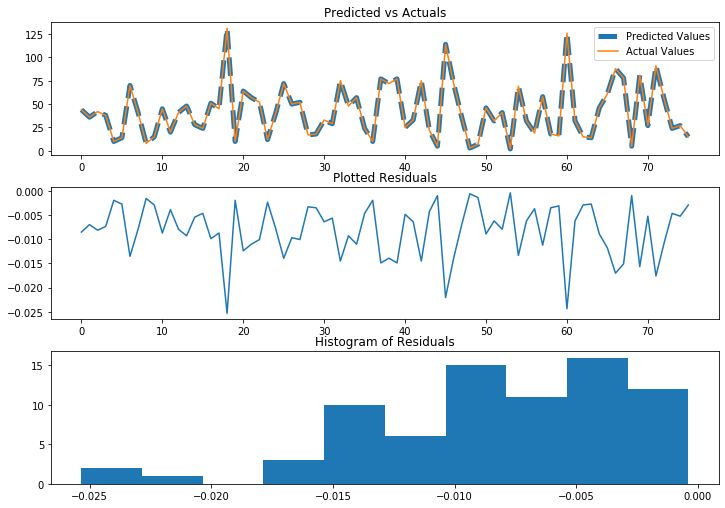

In [9]:
f, ax = plt.subplots(figsize=(10, 7), nrows=3)
f.tight_layout()

ax[0].plot(range(len(train_preds)), train_preds, '--', linewidth=5,
               label='Predicted Values');
ax[0].plot(range(len(train_preds)), Y_train, 
               label='Actual Values');
ax[0].set_title("Predicted vs Actuals")
ax[0].legend(loc='best')

ax[1].plot(range(len(train_preds)), 
               train_preds - Y_train);
ax[1].set_title("Plotted Residuals")

ax[2].hist(train_preds - Y_train);
ax[2].set_title("Histogram of Residuals")

In [10]:
test_preds = gpr.predict(X_test)

In [11]:
print(test_preds)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
